In [1]:
#https://www.kaggle.com/wordsforthewise/lending-club

In [2]:
#LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. 
#It was the first peer-to-peer lender to register its offerings as securities with the 
#Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. 
#LendingClub is the world's largest peer-to-peer lending platform.

#Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off),
#can we build a model thatcan predict wether or nor a borrower will pay back their loan? 
#This way in the future when we get a new potential customer we can assess whether or not they are
#likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!
#The "loan_status" column contains our label.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
sns.set_style('whitegrid')

In [6]:
df_info = pd.read_csv('../DATA/lending_club_info.csv', index_col='LoanStatNew')

In [7]:
df_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [8]:
df_info.loc['loan_amnt']['Description']

'The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.'

In [9]:
df_info.loc['term']['Description']

'The number of payments on the loan. Values are in months and can be either 36 or 60.'

In [10]:
df_info.loc['int_rate']['Description']

'Interest Rate on the loan'

In [11]:
df_info.loc['installment']['Description']

'The monthly payment owed by the borrower if the loan originates.'

In [12]:
df_info.loc['grade']['Description']

'LC assigned loan grade'

In [13]:
#Load actual data
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [14]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [15]:
df.info()
#396030*27

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [16]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [17]:
total = df.isnull().count()
missing_count = df.isnull().sum()
missing_perc = (missing_count/total)*100
missing_dict = {'total': total, 'missing_count': missing_count, 'missing_perc':missing_perc}
missing_df = pd.DataFrame(missing_dict)
missing_df.head()
missing_df[missing_df['missing_count']>0]#'emp_length','mort_acc','pub_rec_bankruptcies'

,total,missing_count,missing_perc
emp_title,396030,22927,5.789208
emp_length,396030,18301,4.621115
title,396030,1755,0.443148
revol_util,396030,276,0.069692
mort_acc,396030,37795,9.543469
pub_rec_bankruptcies,396030,535,0.135091


<AxesSubplot:xlabel='loan_status', ylabel='count'>

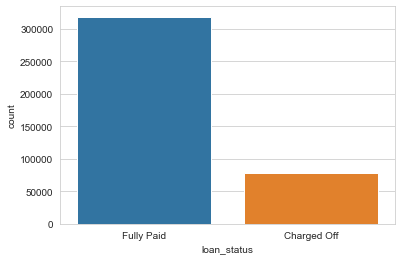

In [18]:
sns.countplot(x='loan_status', data=df)
#imbalanced class

In [19]:
df['emp_title'].unique()
#len(df['emp_title'].unique()) #173105

array(['Marketing', 'Credit analyst ', 'Statistician', ...,
       "Michael's Arts & Crafts", 'licensed bankere',
       'Gracon Services, Inc'], dtype=object)

In [20]:
df['emp_title'].value_counts()
#Too much distinct emp_title, better to drop this column

Teacher                            4389
Manager                            4250
Registered Nurse                   1856
RN                                 1846
Supervisor                         1830
                                   ... 
Three Tikes LLC                       1
Trademark Docketing Coordinator       1
Mont Co Public Schools                1
Operations Review Specialist          1
Quest Title Agency, Inc.              1
Name: emp_title, Length: 173105, dtype: int64

In [21]:
df['title'].value_counts()
#Too much distinct title, better to drop this column

Debt consolidation                     152472
Credit card refinancing                 51487
Home improvement                        15264
Other                                   12930
Debt Consolidation                      11608
                                        ...  
The Debt Solution That WORKS For Me         1
Pay off and be done                         1
Dept consarted                              1
Paying down graduate school debt            1
new kitchen loan                            1
Name: title, Length: 48817, dtype: int64

In [22]:
df['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [23]:
df['emp_length'].fillna('10+ years', inplace=True)

In [24]:
df['pub_rec_bankruptcies'].fillna(0.0, inplace=True)

In [25]:
df['mort_acc'].fillna(0.0, inplace=True)

<AxesSubplot:>

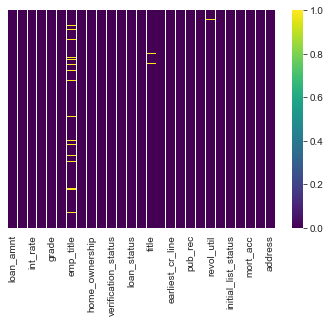

In [26]:
sns.heatmap(df.isnull(), cmap='viridis', yticklabels=False)

In [27]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [28]:
df['earliest_cr_line'].value_counts()

Oct-2000    3017
Aug-2000    2935
Oct-2001    2896
Aug-2001    2884
Nov-2000    2736
            ... 
Sep-1956       1
Jun-1955       1
May-1958       1
Nov-1953       1
Sep-1960       1
Name: earliest_cr_line, Length: 684, dtype: int64

In [29]:
df['address'] = df['address'].apply(lambda add:str(add[-5:]))

In [30]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date:str(date[-4:]))

In [31]:
#df['issue_d'] = df['issue_d'].apply(lambda date:str(date[-4:]))

In [32]:
#df['issue_d'].value_counts()

<Figure size 1008x360 with 0 Axes>

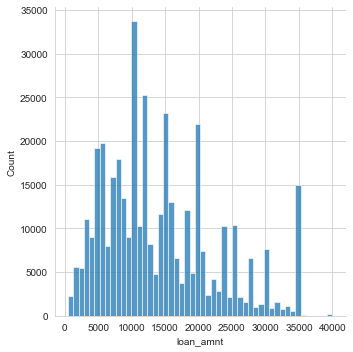

In [33]:
plt.figure(figsize=(14,5))
sns.displot(df['loan_amnt'],kde=False,bins=50)
#outlier with loan amount>35000

In [34]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

<AxesSubplot:ylabel='loan_amnt'>

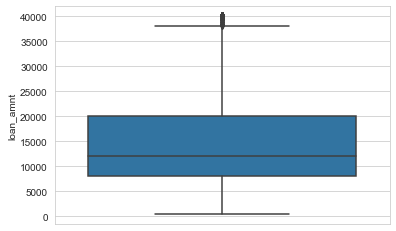

In [35]:
sns.boxplot(y='loan_amnt', data=df, hue='loan_status')
#this also shows outliers>38000

In [36]:
df = df[df['loan_amnt']<38000] #removing outliers

In [37]:
df.drop(['emp_title','title','sub_grade','revol_util'], axis=1, inplace=True)
#or extract year from 'issue_d' and 'earliest_cr_line'

In [38]:
total = df.isnull().count()
missing_count = df.isnull().sum()
missing_perc = (missing_count/total)*100
missing_dict = {'total': total, 'missing_count': missing_count, 'missing_perc':missing_perc}
missing_df = pd.DataFrame(missing_dict)
missing_df.head()
missing_df[missing_df['missing_count']>0]#'emp_length','mort_acc','pub_rec_bankruptcies'

,total,missing_count,missing_perc


<AxesSubplot:>

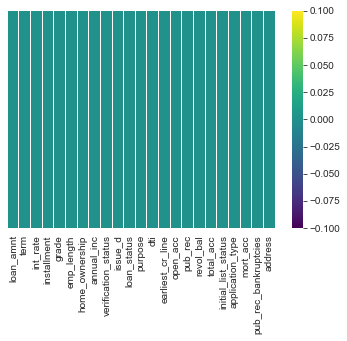

In [39]:
sns.heatmap(df.isnull(), cmap='viridis', yticklabels=False)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395836 entries, 0 to 396029
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395836 non-null  float64
 1   term                  395836 non-null  object 
 2   int_rate              395836 non-null  float64
 3   installment           395836 non-null  float64
 4   grade                 395836 non-null  object 
 5   emp_length            395836 non-null  object 
 6   home_ownership        395836 non-null  object 
 7   annual_inc            395836 non-null  float64
 8   verification_status   395836 non-null  object 
 9   issue_d               395836 non-null  object 
 10  loan_status           395836 non-null  object 
 11  purpose               395836 non-null  object 
 12  dti                   395836 non-null  float64
 13  earliest_cr_line      395836 non-null  object 
 14  open_acc              395836 non-null  float64
 15  

In [41]:
df.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395836 entries, 0 to 396029
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   term                 395836 non-null  object
 1   grade                395836 non-null  object
 2   emp_length           395836 non-null  object
 3   home_ownership       395836 non-null  object
 4   verification_status  395836 non-null  object
 5   issue_d              395836 non-null  object
 6   loan_status          395836 non-null  object
 7   purpose              395836 non-null  object
 8   earliest_cr_line     395836 non-null  object
 9   initial_list_status  395836 non-null  object
 10  application_type     395836 non-null  object
 11  address              395836 non-null  object
dtypes: object(12)
memory usage: 39.3+ MB


In [42]:
df['application_type'].value_counts()

INDIVIDUAL    395134
JOINT            417
DIRECT_PAY       285
Name: application_type, dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395836 entries, 0 to 396029
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395836 non-null  float64
 1   term                  395836 non-null  object 
 2   int_rate              395836 non-null  float64
 3   installment           395836 non-null  float64
 4   grade                 395836 non-null  object 
 5   emp_length            395836 non-null  object 
 6   home_ownership        395836 non-null  object 
 7   annual_inc            395836 non-null  float64
 8   verification_status   395836 non-null  object 
 9   issue_d               395836 non-null  object 
 10  loan_status           395836 non-null  object 
 11  purpose               395836 non-null  object 
 12  dti                   395836 non-null  float64
 13  earliest_cr_line      395836 non-null  object 
 14  open_acc              395836 non-null  float64
 15  

In [44]:
df['purpose'].value_counts()

debt_consolidation    234406
credit_card            82992
home_improvement       23999
other                  21175
major_purchase          8778
small_business          5694
car                     4695
medical                 4196
moving                  2852
vacation                2451
house                   2200
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

In [45]:
#create dummies

In [46]:
df.select_dtypes('object').columns

Index(['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [47]:
dummies = pd.get_dummies(df[['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type','address']], drop_first=True)

In [48]:
df = pd.concat([df,dummies], axis=1)

In [49]:
df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,application_type_JOINT,address_05113,address_11650,address_22690,address_29597,address_30723,address_48052,address_70466,address_86630,address_93700
0,10000.0,36 months,11.44,329.48,B,10+ years,RENT,117000.0,Not Verified,Jan-2015,...,0,0,0,1,0,0,0,0,0,0
1,8000.0,36 months,11.99,265.68,B,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36 months,10.49,506.97,B,< 1 year,RENT,43057.0,Source Verified,Jan-2015,...,0,1,0,0,0,0,0,0,0,0
3,7200.0,36 months,6.49,220.65,A,6 years,RENT,54000.0,Not Verified,Nov-2014,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60 months,17.27,609.33,C,9 years,MORTGAGE,55000.0,Verified,Apr-2013,...,0,0,1,0,0,0,0,0,0,0


In [50]:
#remove original columns on which dummies created
df.drop(['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type','address', 'issue_d'], axis=1, inplace=True)

In [51]:
df.head()

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,total_acc,...,application_type_JOINT,address_05113,address_11650,address_22690,address_29597,address_30723,address_48052,address_70466,address_86630,address_93700
0,10000.0,11.44,329.48,117000.0,Fully Paid,26.24,16.0,0.0,36369.0,25.0,...,0,0,0,1,0,0,0,0,0,0
1,8000.0,11.99,265.68,65000.0,Fully Paid,22.05,17.0,0.0,20131.0,27.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,10.49,506.97,43057.0,Fully Paid,12.79,13.0,0.0,11987.0,26.0,...,0,1,0,0,0,0,0,0,0,0
3,7200.0,6.49,220.65,54000.0,Fully Paid,2.60,6.0,0.0,5472.0,13.0,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,17.27,609.33,55000.0,Charged Off,33.95,13.0,0.0,24584.0,43.0,...,0,0,1,0,0,0,0,0,0,0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395836 entries, 0 to 396029
Columns: 125 entries, loan_amnt to address_93700
dtypes: float64(11), object(1), uint8(113)
memory usage: 81.9+ MB


In [53]:
df.select_dtypes('object').columns

Index(['loan_status'], dtype='object')

In [54]:
df['loan_status'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [55]:
df.select_dtypes('object').columns

Index([], dtype='object')

<AxesSubplot:>

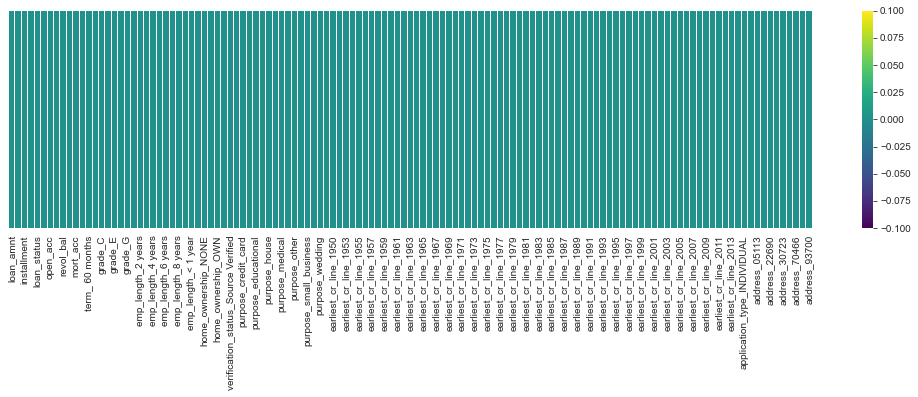

In [56]:
plt.figure(figsize=(18,4))
sns.heatmap(df.isnull(), cmap='viridis', yticklabels=False)

In [57]:
total = df.isnull().count()
missing_count = df.isnull().sum()
missing_perc = (missing_count/total)*100
missing_dict = {'total': total, 'missing_count': missing_count, 'missing_perc':missing_perc}
missing_df = pd.DataFrame(missing_dict)
missing_df.head()
missing_df[missing_df['missing_count']>0]#'emp_length','mort_acc','pub_rec_bankruptcies'

,total,missing_count,missing_perc


In [58]:
#X and Y split

In [59]:
import tensorflow as tf

In [60]:
from tensorflow.keras.utils import to_categorical

In [61]:
X = df.drop('loan_status', axis=1).values

In [62]:
Y = df['loan_status'].values
#Y = to_categorical(df['loan_status'])

In [63]:
Y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [64]:
#train-test split

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=43)

In [67]:
#preprocessing

In [68]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
scaler = MinMaxScaler(feature_range=(0,1))

In [70]:
xtrain_scaled = scaler.fit_transform(xtrain)

In [71]:
xtest_scaled = scaler.transform(xtest)

In [72]:
xtrain_scaled.shape

(277085, 124)

In [73]:
xtest_scaled.shape

(118751, 124)

In [74]:
#create deep learning network

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [76]:
model = Sequential()

In [77]:
# input layer
model.add(Dense(124,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

In [78]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [79]:
model.fit(x=xtrain_scaled, 
          y=ytrain, 
          epochs=25,
          batch_size=256,
          validation_data=(xtest_scaled, ytest), verbose=1
          )

Epoch 1/25
1083/1083 [==============================] - 5s 4ms/step - loss: 0.2902 - val_loss: 0.2620
Epoch 2/25
1083/1083 [==============================] - 5s 4ms/step - loss: 0.2640 - val_loss: 0.2588
Epoch 3/25
1083/1083 [==============================] - 5s 4ms/step - loss: 0.2623 - val_loss: 0.2591
Epoch 4/25
1083/1083 [==============================] - 4s 4ms/step - loss: 0.2613 - val_loss: 0.2589
Epoch 5/25
1083/1083 [==============================] - 5s 4ms/step - loss: 0.2603 - val_loss: 0.2582
Epoch 6/25
1083/1083 [==============================] - 4s 4ms/step - loss: 0.2599 - val_loss: 0.2585
Epoch 7/25
1083/1083 [==============================] - 5s 4ms/step - loss: 0.2592 - val_loss: 0.2584
Epoch 8/25
1083/1083 [==============================] - 5s 5ms/step - loss: 0.2584 - val_loss: 0.2591
Epoch 9/25
1083/1083 [==============================] - 5s 4ms/step - loss: 0.2581 - val_loss: 0.2584oss: 0.2
Epoch 10/25
1083/1083 [==============================] - 5s 4ms/step - los

In [80]:
#save model
from tensorflow.keras.models import load_model

In [81]:
model.save('model.h5')  

In [82]:
#Model evaluation

In [83]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

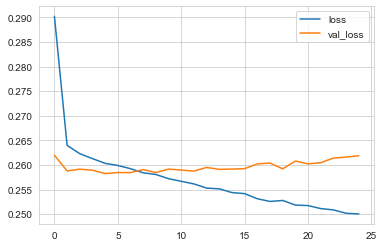

In [84]:
losses[['loss','val_loss']].plot()

In [85]:
ytest

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [86]:
from sklearn.metrics import classification_report,confusion_matrix

In [87]:
predictions = model.predict_classes(xtest_scaled)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [88]:
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.93      0.46      0.62     23165
           1       0.88      0.99      0.93     95586

    accuracy                           0.89    118751
   macro avg       0.91      0.73      0.78    118751
weighted avg       0.89      0.89      0.87    118751



In [89]:
model.predict(xtest_scaled)

array([[0.7643319 ],
       [1.        ],
       [1.        ],
       ...,
       [0.6117554 ],
       [1.        ],
       [0.64469695]], dtype=float32)

In [90]:
#predictions = np.argmax(model.predict(xtest_scaled), axis=-1)
predictions = np.round(model.predict(xtest_scaled))

In [91]:
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.93      0.46      0.62     23165
           1       0.88      0.99      0.93     95586

    accuracy                           0.89    118751
   macro avg       0.91      0.73      0.78    118751
weighted avg       0.89      0.89      0.87    118751



In [92]:
#End